In [1]:
import pandas as pd
from utils import load_data

# EDA for META Historical Data

In [2]:
# Load the data
df = load_data('META_historical_data.csv', base_dir='../data/yfinance_data')

# Summary statistics for all numeric columns
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()

# List columns with >5% nulls
threshold = 0.05 * len(df)
columns_with_many_nulls = missing_values[missing_values > threshold].index.tolist()

print("Summary Statistics:\n", summary_stats)
print("\nMissing Value Report:\n", missing_values)
print("\nColumns with >5% nulls:\n", columns_with_many_nulls)

Summary Statistics:
               Open         High          Low        Close    Adj Close  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean    179.557215   181.875331   177.317761   179.649453   179.305921   
std     108.864895   110.256219   107.511134   108.906971   108.755055   
min      22.990000    23.090000    22.670000    22.900000    22.853037   
25%      97.767502    98.772499    95.889997    97.382498    97.182795   
50%     166.870003   168.850006   164.210007   166.855003   166.512825   
75%     231.450005   234.934998   228.687504   232.424999   231.948360   
max     542.349976   542.809998   528.359985   539.909973   539.909973   

             Volume    Dividends  Stock Splits  
count  2.926000e+03  2926.000000        2926.0  
mean   2.872083e+07     0.000342           0.0  
std    2.269811e+07     0.013070           0.0  
min    5.467500e+06     0.000000           0.0  
25%    1.571308e+07     0.000000           0.0  
50%    2.176100e+0

# Technical Analysis Indicators with TA-Lib
This section demonstrates how to calculate and analyze common technical indicators such as Moving Averages, RSI, and MACD using TA-Lib on META historical data.

In [3]:
import talib
# Calculate 20-day and 50-day Simple Moving Averages (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Calculate Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the last few rows to show the new indicator columns
df[['Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist']].tail()

,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
2921,461.269989,502.223499,492.399200,36.964279,-6.550694,-1.274374,-5.276320
2922,453.410004,499.237999,492.107200,34.814669,-8.810746,-2.781648,-6.029098
2923,465.700012,496.545000,491.984200,40.628601,-9.500635,-4.125446,-5.375189
2924,465.709991,494.619499,491.667599,40.633231,-9.932081,-5.286773,-4.645308
2925,463.190002,492.545000,491.466799,39.789373,-10.357947,-6.301008,-4.056939


# Visualize Technical Indicators
Visualize the stock price along with SMA, RSI, and MACD to better understand their impact on META price trends.

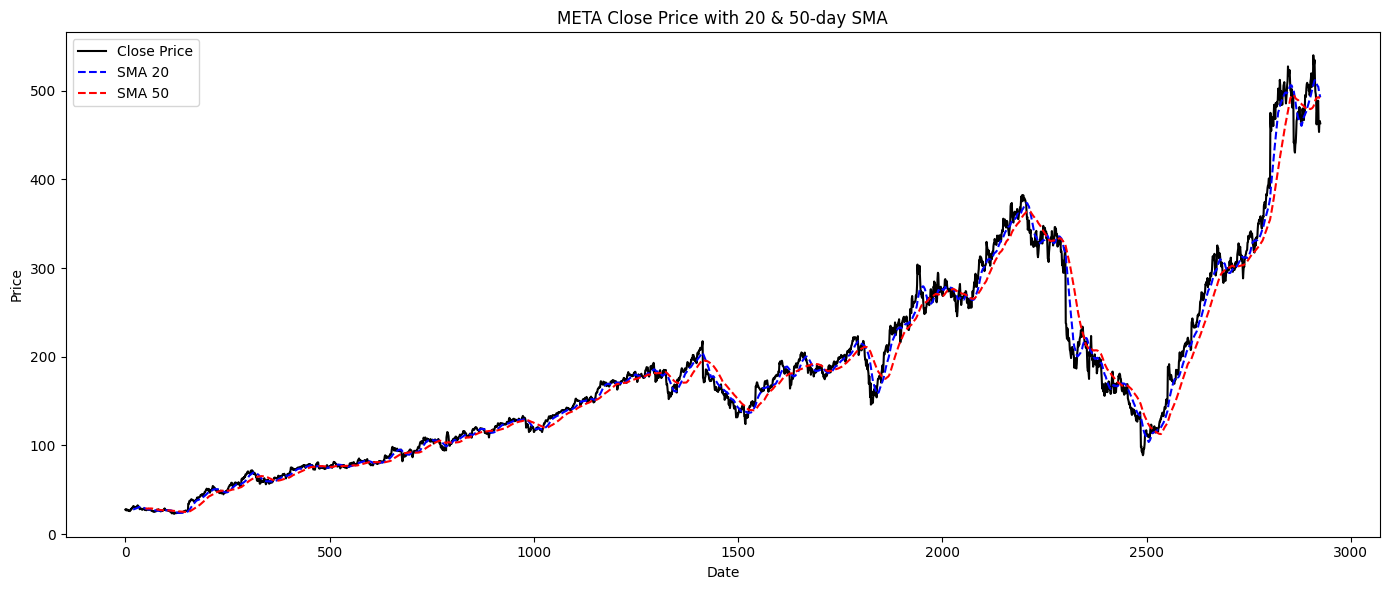

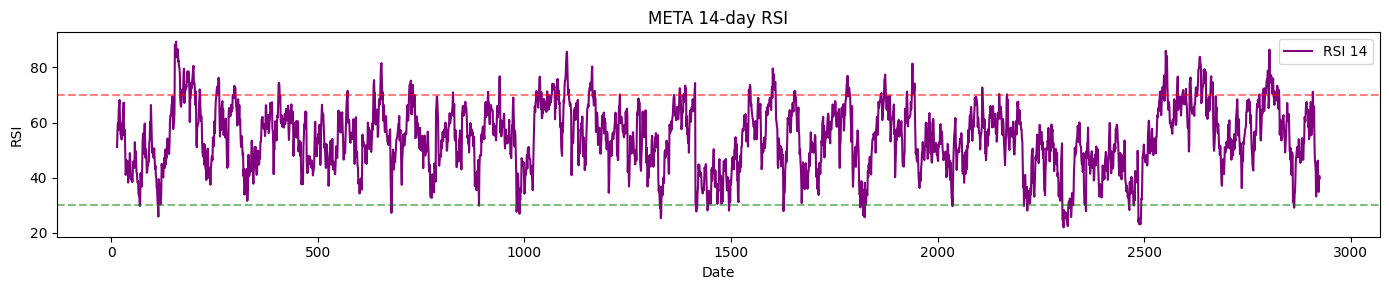

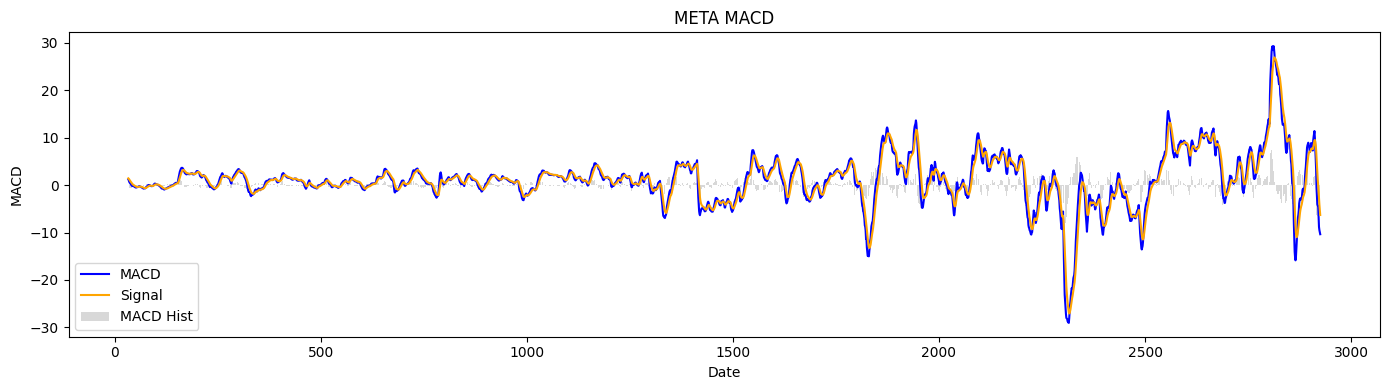

In [4]:
import matplotlib.pyplot as plt

# Plot Close price with SMA overlays
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
plt.plot(df['SMA_50'], label='SMA 50', color='red', linestyle='--')
plt.title('META Close Price with 20 & 50-day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('META 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.bar(df.index, df['MACD_Hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title('META MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.tight_layout()
plt.show()